In [ ]:
!sudo apt install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [106]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filename

Saving 서울공원전처리.csv to 서울공원전처리.csv


'서울공원전처리.csv'

In [108]:
from google.colab import files
uploaded = files.upload()
filename1 = list(uploaded.keys())[0]
filename1

Saving 서울시 인구와 면적.txt to 서울시 인구와 면적.txt


'서울시 인구와 면적.txt'

# 1. 자치구별 공원 면적과 공원수

In [109]:
df =  pd.read_csv(filename)

In [110]:
df.head(2)

,공원명,지역,면적,분류,크기,경도,위도
0,남산도시자연공원,중구,2896887,대형,15,126.990377,37.550140
1,길동생태공원,강동구,80683,소형,3,127.154779,37.540394


In [111]:
df1 = df.groupby('지역')['면적'].agg(['sum', 'count'])

In [112]:
df1.columns = ['총 면적', '공원수']

In [113]:
df1.head()

,총 면적,공원수
지역,,
강남구,3626398,7
강동구,1526390,7
강북구,3714902,4
강서구,2194154,9
과천시,9132690,1


# 2. 구별 공원 면적 비율 및 인당 공원 면적 비교

In [114]:
with open('서울시 인구와 면적.txt', 'r') as f:
    txt = f.readlines()
txt

['기간\t지역\t인구\t면적\t인구밀도(명/㎢)\n',
 '2020\t합계\t9,911,088\t605.23\t16,376\n',
 '2020\t종로구\t158,996\t23.91\t6,649\n',
 '2020\t중구\t134,635\t9.96\t13,517\n',
 '2020\t용산구\t244,645\t21.87\t11,188\n',
 '2020\t성동구\t300,505\t16.86\t17,822\n',
 '2020\t광진구\t360,109\t17.06\t21,105\n',
 '2020\t동대문구\t357,014\t14.22\t25,114\n',
 '2020\t중랑구\t399,562\t18.5\t21,603\n',
 '2020\t성북구\t447,056\t24.58\t18,190\n',
 '2020\t강북구\t311,569\t23.6\t13,202\n',
 '2020\t도봉구\t327,361\t20.65\t15,852\n',
 '2020\t노원구\t527,032\t35.44\t14,872\n',
 '2020\t은평구\t484,043\t29.71\t16,292\n',
 '2020\t서대문구\t322,952\t17.63\t18,322\n',
 '2020\t마포구\t381,858\t23.85\t16,011\n',
 '2020\t양천구\t457,781\t17.41\t26,301\n',
 '2020\t강서구\t585,901\t41.44\t14,140\n',
 '2020\t구로구\t432,488\t20.12\t21,496\n',
 '2020\t금천구\t247,835\t13.02\t19,035\n',
 '2020\t영등포구\t407,367\t24.55\t16,595\n',
 '2020\t동작구\t401,572\t16.35\t24,555\n',
 '2020\t관악구\t509,803\t29.57\t17,241\n',
 '2020\t서초구\t429,025\t46.98\t9,132\n',
 '2020\t강남구\t544,055\t39.5\t13,773\n',
 '2020\t송파

In [115]:
column_name = txt[0].strip().split('\t')
data_split = [x.strip().split('\t') for x in txt[2:]]
pop_data = pd.DataFrame(data_split, columns=column_name)
pop_data.head(2)

,기간,지역,인구,면적,인구밀도(명/㎢)
0,2020,종로구,"158,996",23.91,"6,649"
1,2020,중구,"134,635",9.96,"13,517"


In [116]:
# 1. 인덱스를 '지역'으로 변경 
pop_data.index = pop_data.지역

In [117]:
# 2. '지역'컬럼 삭제
pop_data = pop_data[['기간', '인구', '면적', '인구밀도(명/㎢)']]
pop_data.head(2)

,기간,인구,면적,인구밀도(명/㎢)
지역,,,,
종로구,2020,"158,996",23.91,"6,649"
중구,2020,"134,635",9.96,"13,517"


In [162]:
# 3. 인구와 면적 공원수를 합침 merge or join or concat
pop_area = pd.concat([df1, pop_data], axis=1)
pop_area.head(2)

,총 면적,공원수,기간,인구,면적,인구밀도(명/㎢)
지역,,,,,,
강남구,3626398,7,2020,"544,055",39.5,"13,773"
강동구,1526390,7,2020,"463,998",24.59,"18,869"


In [163]:
pop_area.isnull().sum()

총 면적         0
공원수          0
기간           1
인구           1
면적           1
인구밀도(명/㎢)    1
dtype: int64

In [164]:
pop_area[pop_area.기간.isnull() == True]

,총 면적,공원수,기간,인구,면적,인구밀도(명/㎢)
지역,,,,,,
과천시,9132690,1,NaN,NaN,NaN,NaN


In [165]:
pop_area = pop_area.dropna()

In [166]:
pop_area.isnull().sum()

총 면적         0
공원수          0
기간           0
인구           0
면적           0
인구밀도(명/㎢)    0
dtype: int64

In [167]:
pop_area.head(2)

,총 면적,공원수,기간,인구,면적,인구밀도(명/㎢)
지역,,,,,,
강남구,3626398,7,2020,"544,055",39.5,"13,773"
강동구,1526390,7,2020,"463,998",24.59,"18,869"


In [168]:
# 컬럼은 ['지역 공원면적 공원수 인구 면적']
pop_area.rename(columns={'총 면적':'공원면적'},inplace=True)

In [169]:
pop_area.head(2)

,공원면적,공원수,기간,인구,면적,인구밀도(명/㎢)
지역,,,,,,
강남구,3626398,7,2020,"544,055",39.5,"13,773"
강동구,1526390,7,2020,"463,998",24.59,"18,869"


In [170]:
pop_area = pop_area[['공원면적', '공원수', '인구', '면적']]
pop_area.head(2)

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,"544,055",39.5
강동구,1526390,7,"463,998",24.59


In [171]:
# 4. 면적 * 1000000
pop_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   공원면적    25 non-null     int64 
 1   공원수     25 non-null     int64 
 2   인구      25 non-null     object
 3   면적      25 non-null     object
dtypes: int64(2), object(2)
memory usage: 1000.0+ bytes


In [172]:
pop_area['면적'] = pop_area.면적.apply(lambda x : float(x)*1000000)

In [173]:
pop_area['인구'] = pop_area.인구.apply(lambda x : float(x.replace(',', '')))

In [174]:
pop_area.head(2)

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,544055.0,39500000.0
강동구,1526390,7,463998.0,24590000.0


In [175]:
# 5. 면적비율, 인당면적
pop_area['면적비율'] = pop_area.공원면적 / pop_area.면적 * 100
pop_area.head(2)

,공원면적,공원수,인구,면적,면적비율
지역,,,,,
강남구,3626398,7,544055.0,39500000.0,9.180754
강동구,1526390,7,463998.0,24590000.0,6.207361


In [176]:
pop_area['인당면적'] = pop_area.공원면적 / pop_area.인구
pop_area.head(2)

,공원면적,공원수,인구,면적,면적비율,인당면적
지역,,,,,,
강남구,3626398,7,544055.0,39500000.0,9.180754,6.665499
강동구,1526390,7,463998.0,24590000.0,6.207361,3.289648


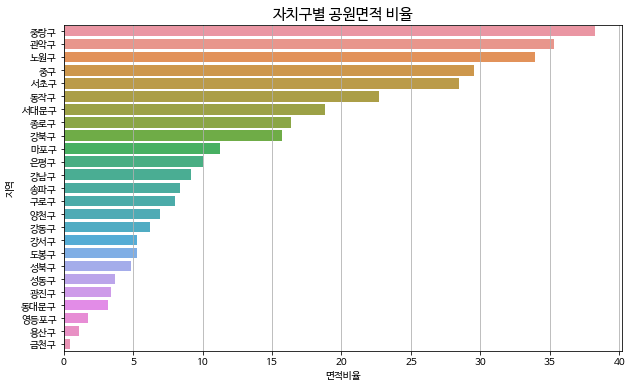

In [182]:
# 6. 시각화 barh - 자치구별 공원면적 비율
import seaborn as sns
plt.figure(figsize=(10,6))
plt.grid()
order = pop_area.면적비율.sort_values(ascending=False).index
sns.barplot(x='면적비율', y=pop_area.index, data=pop_area, order=order)
plt.title('자치구별 공원면적 비율', size=15)
plt.show()

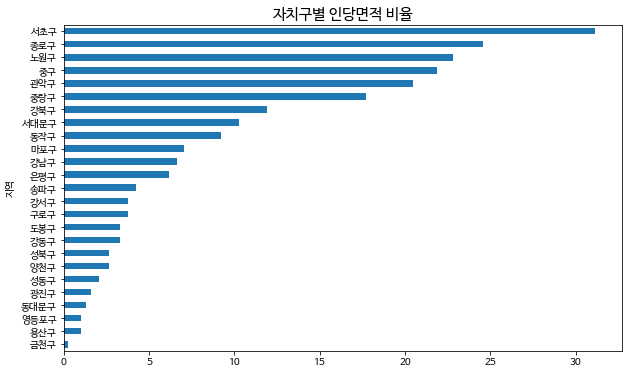

In [185]:
# 7. 시각화 barh - 인당 공원 면적
plt.figure(figsize=(10,6))
plt.grid()
pop_area.인당면적.sort_values().plot(kind='barh')
plt.title('자치구별 인당면적 비율', size=15)
plt.show()

In [186]:
# 8. 저장
pop_area.to_csv('서울공원 데이터분석.csv', index=False)